In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np

In [2]:
cases_18_29 = pd.read_csv('cases_by_race_ethnicity__18_-_29_years.csv', header=2, index_col=0)
death_18_29 = pd.read_csv('deaths_by_race_ethnicity__18_-_29_years.csv', header=2, index_col=0)

In [3]:
cases_18_29 = cases_18_29.sort_index(ascending=True)
death_18_29 = death_18_29.sort_index(ascending=True)

In [4]:
code = ['American Indian or Alaska Native','Asian','Black','Latino','Multi-Race','Native Hawaiian and other Pacific Islander','White']
cases_18_29.index = code
death_18_29.index = code

In [5]:
cases_18_29

,Percent of cases,Percent of US population
American Indian or Alaska Native,1.0,0.85
Asian,3.4,6.11
Black,10.5,14.44
Latino,32.9,21.96
Multi-Race,5.6,2.89
Native Hawaiian and other Pacific Islander,0.3,0.21
White,46.3,53.54


In [6]:
cases_death = pd.merge(left = cases_18_29, right = death_18_29, on='Percent of US population')
cases_death.index = code
cases_death

,Percent of cases,Percent of US population,Percentage of deaths
American Indian or Alaska Native,1.0,0.85,2.5
Asian,3.4,6.11,2.7
Black,10.5,14.44,24.4
Latino,32.9,21.96,38.4
Multi-Race,5.6,2.89,4.4
Native Hawaiian and other Pacific Islander,0.3,0.21,0.6
White,46.3,53.54,26.9


In [7]:
death_18_29

,Percentage of deaths,Percent of US population
American Indian or Alaska Native,2.5,0.85
Asian,2.7,6.11
Black,24.4,14.44
Latino,38.4,21.96
Multi-Race,4.4,2.89
Native Hawaiian and other Pacific Islander,0.6,0.21
White,26.9,53.54


In [8]:
ca = pd.read_csv('data_files/covid19casesdemographics.csv')
ca.head(5)

,demographic_category,demographic_value,total_cases,percent_cases,deaths,percent_deaths,percent_of_ca_population,report_date
0,Age Group,0-17,855,2.3,0,0.0,22.5,2020-04-22
1,Age Group,0-17,936,2.4,0,0.0,22.5,2020-04-23
2,Age Group,0-17,1011,2.5,0,0.0,22.5,2020-04-24
3,Age Group,0-17,1039,2.5,0,0.0,22.5,2020-04-25
4,Age Group,0-17,1085,2.5,0,0.0,22.5,2020-04-26


In [9]:
ca = ca[(ca['demographic_category']=='Race Ethnicity')&(ca['report_date']=='2021-04-14')]
ca

,demographic_category,demographic_value,total_cases,percent_cases,deaths,percent_deaths,percent_of_ca_population,report_date
3946,Race Ethnicity,American Indian or Alaska Native,9730,0.3,215,0.4,0.5,2021-04-14
4313,Race Ethnicity,Asian,197722,6.9,7092,12.1,15.4,2021-04-14
4680,Race Ethnicity,Black,118986,4.2,3702,6.3,6.0,2021-04-14
5047,Race Ethnicity,Latino,1591357,55.6,27452,46.8,38.9,2021-04-14
5414,Race Ethnicity,Multi-Race,48387,1.7,763,1.3,2.2,2021-04-14
5781,Race Ethnicity,Native Hawaiian and other Pacific Islander,15964,0.6,315,0.5,0.3,2021-04-14
6148,Race Ethnicity,Other,299537,10.5,801,1.4,0.0,2021-04-14
6515,Race Ethnicity,Total,2861737,100.0,58657,100.0,100.0,2021-04-14
6882,Race Ethnicity,White,580054,20.3,18317,31.2,36.6,2021-04-14


In [10]:
total_cases_percent = ca[['percent_cases', 'percent_of_ca_population','demographic_value']].groupby('demographic_value').max()
total_deaths_percent = ca[['percent_deaths', 'percent_of_ca_population','demographic_value']].groupby('demographic_value').max()

total_cases_percent = total_cases_percent.drop('Total',axis = 0)
total_deaths_percent = total_deaths_percent.drop('Total',axis = 0)

total_cases_percent.sort_index(inplace=True)
total_deaths_percent.sort_index(inplace=True)

In [11]:
total_cases_percent

,percent_cases,percent_of_ca_population
demographic_value,,
American Indian or Alaska Native,0.3,0.5
Asian,6.9,15.4
Black,4.2,6.0
Latino,55.6,38.9
Multi-Race,1.7,2.2
Native Hawaiian and other Pacific Islander,0.6,0.3
Other,10.5,0.0
White,20.3,36.6


In [12]:
total_deaths_percent

,percent_deaths,percent_of_ca_population
demographic_value,,
American Indian or Alaska Native,0.4,0.5
Asian,12.1,15.4
Black,6.3,6.0
Latino,46.8,38.9
Multi-Race,1.3,2.2
Native Hawaiian and other Pacific Islander,0.5,0.3
Other,1.4,0.0
White,31.2,36.6


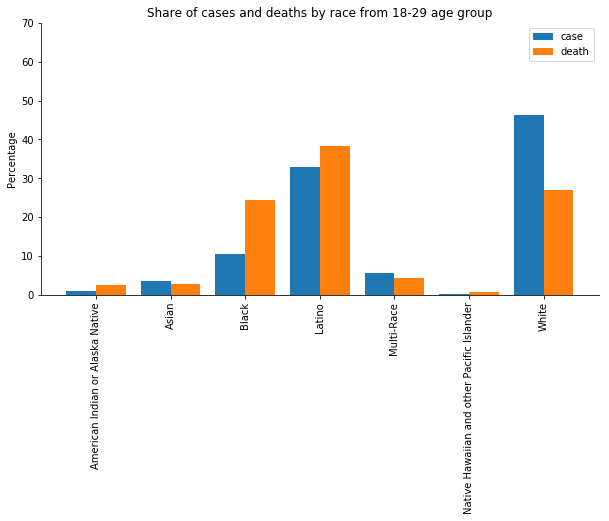

In [13]:
fig, ax = plt.subplots(figsize=(10,5))

axis = np.arange(len(code))

plt.bar(axis-0.2,cases_death['Percent of cases'], 0.4, label = 'case')
plt.bar(axis+0.2,cases_death['Percentage of deaths'], 0.4, label = 'death')

plt.xticks(axis, code,rotation=90)

plt.legend()
ax.set_ylabel('Percentage')
ax.set_ylim(0,70)
ax.set_title('Share of cases and deaths by race from 18-29 age group')
sns.despine(ax=ax)
plt.savefig('national.png')
    
plt.show()

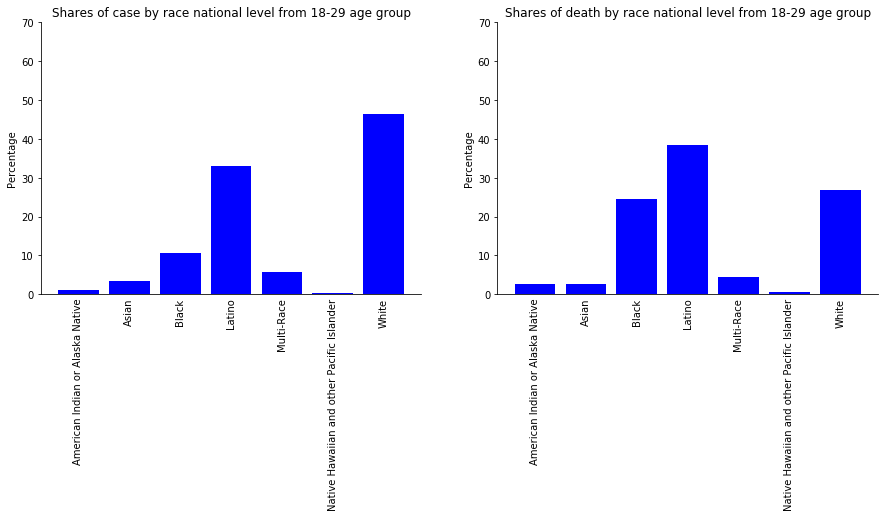

In [14]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].bar(cases_18_29.index, cases_18_29['Percent of cases'], color='blue')
ax[0].set_title('Shares of case by race national level from 18-29 age group')


ax[1].bar(death_18_29.index, death_18_29['Percentage of deaths'], color='blue')
ax[1].set_title('Shares of death by race national level from 18-29 age group')

for i in range(2):
    ax[i].set_ylabel('Percentage')
    ax[i].set_ylim(0,70)
    ax[i].tick_params(axis='x', labelrotation=90, length=0)
    sns.despine(ax=ax[i])
    
plt.show()

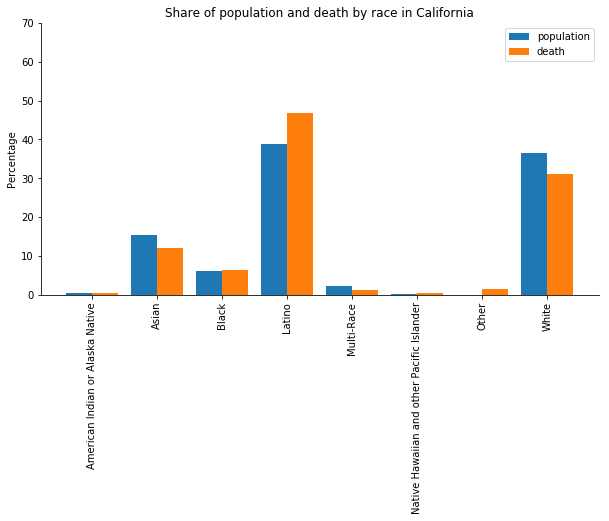

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

x = ['American Indian or Alaska Native','Asian','Black','Latino','Multi-Race','Native Hawaiian and other Pacific Islander','Other','White']
x_axis = np.arange(len(x))

plt.bar(x_axis-0.2,total_deaths_percent['percent_of_ca_population'], 0.4, label = 'population')
plt.bar(x_axis+0.2,total_deaths_percent['percent_deaths'], 0.4, label = 'death')


plt.xticks(x_axis, x,rotation=90)

plt.legend()
ax.set_ylabel('Percentage')
ax.set_ylim(0,70)
ax.set_title('Share of population and death by race in California')
sns.despine(ax=ax)
plt.savefig('ca.png')
    
plt.show()